<a href="https://colab.research.google.com/github/dseitova/portfolio/blob/main/NLP_team39.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
import numpy as np
import time
%matplotlib inline
from tqdm.notebook import trange, tqdm
from time import sleep
import seaborn as sns
from scipy import stats as stat
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip install vaderSentiment
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 10.9 MB/s 


In [ ]:
import re
import nltk
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
import string
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Reading in files

In [ ]:

com_name = pd.read_csv('drive/MyDrive/Team39/archive/Company.csv')
com_tweet = pd.read_csv('drive/MyDrive/Team39/archive/Company_Tweet.csv')
tweet = pd.read_csv('drive/MyDrive/Team39/archive/Tweet.csv')
tweets = pd.merge(tweet,com_tweet,on='tweet_id',how='inner')
tweets['post_date'] = pd.to_datetime(tweets['post_date'], unit='s')
tweets['date'] = pd.to_datetime(tweets['post_date'].apply(lambda date: date.date()))
tweets.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01
3,550442977802207232,ShowDreamCar,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01
4,550443807834402816,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01


In [ ]:
tweets['post_date'] = pd.to_datetime(tweets['post_date'], unit='s')
tweets['date'] = pd.to_datetime(tweets['post_date'].apply(lambda date: date.date()))
tweets.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01
3,550442977802207232,ShowDreamCar,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01
4,550443807834402816,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01


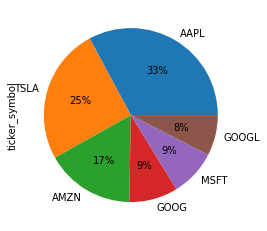

In [ ]:
tweets = tweets.drop(['tweet_id', 'comment_num', 'retweet_num', 'like_num','writer'],axis=1)
tweets.ticker_symbol.value_counts()
tweets.ticker_symbol.value_counts().plot(kind="pie",autopct="%1.0f%%")

In [ ]:
company_name = "AAPL"
company = tweets[tweets['ticker_symbol'] == company_name]
company_stock =  yf.Ticker(company_name).history(start=min(company.date).date(),end=max(company.date).date())
# company

In [ ]:
company

,post_date,body,ticker_symbol,date
0,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",AAPL,2015-01-01
1,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,AAPL,2015-01-01
4,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL,2015-01-01
6,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL,2015-01-01
8,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL,2015-01-01
...,...,...,...,...
4336437,2019-12-31 23:51:01,Imagine calling your broker-dealer and wanting...,AAPL,2019-12-31
4336438,2019-12-31 23:51:06,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",AAPL,2019-12-31
4336439,2019-12-31 23:53:03,That $SPY $SPX puuump in the last hour was the...,AAPL,2019-12-31
4336442,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,AAPL,2019-12-31


In [ ]:
every_tweet = company['body'].tolist()

stop_words = set(stopwords.words('english'))

don_need = ['apple']

for i in trange(len(every_tweet)):
    every_tweet[i] =re.sub("\$\S+", "", every_tweet[i])
    every_tweet[i] = every_tweet[i].lower()
    every_tweet[i] = ''.join([i for i in every_tweet[i] if not i.isdigit()])
    every_tweet[i] = " ".join(every_tweet[i].split())
    every_tweet[i] = re.sub(r"http\S+", "", every_tweet[i])
    every_tweet[i] = re.sub(r"www.\S+", "", every_tweet[i])
    every_tweet[i] = re.sub(r'(!|.)1+', '', every_tweet[i])
    every_tweet[i]  = re.sub(r'[?|$|.|!]',r'',every_tweet[i] )
    every_tweet[i]  = re.sub(r'[^a-zA-Z0-9 ]',r'',every_tweet[i] )

  0%|          | 0/1425013 [00:00<?, ?it/s]

In [ ]:
filtered_sentence=[]
for i in trange(len(every_tweet)):
    every_tweet[i] = word_tokenize(every_tweet[i])
    every_tweet[i] = ' '.join([word for word in every_tweet[i] if not word in stop_words])

  0%|          | 0/1425013 [00:00<?, ?it/s]

In [ ]:
filtered_sentence=[]
for i in trange(len(every_tweet)):
    every_tweet[i] = word_tokenize(every_tweet[i])
    every_tweet[i] = ' '.join([word for word in every_tweet[i] if word not in don_need])

  0%|          | 0/1425013 [00:00<?, ?it/s]

In [ ]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
tweet_All = " ".join(review for review in every_tweet)
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

(-0.5, 399.5, 199.5, -0.5)

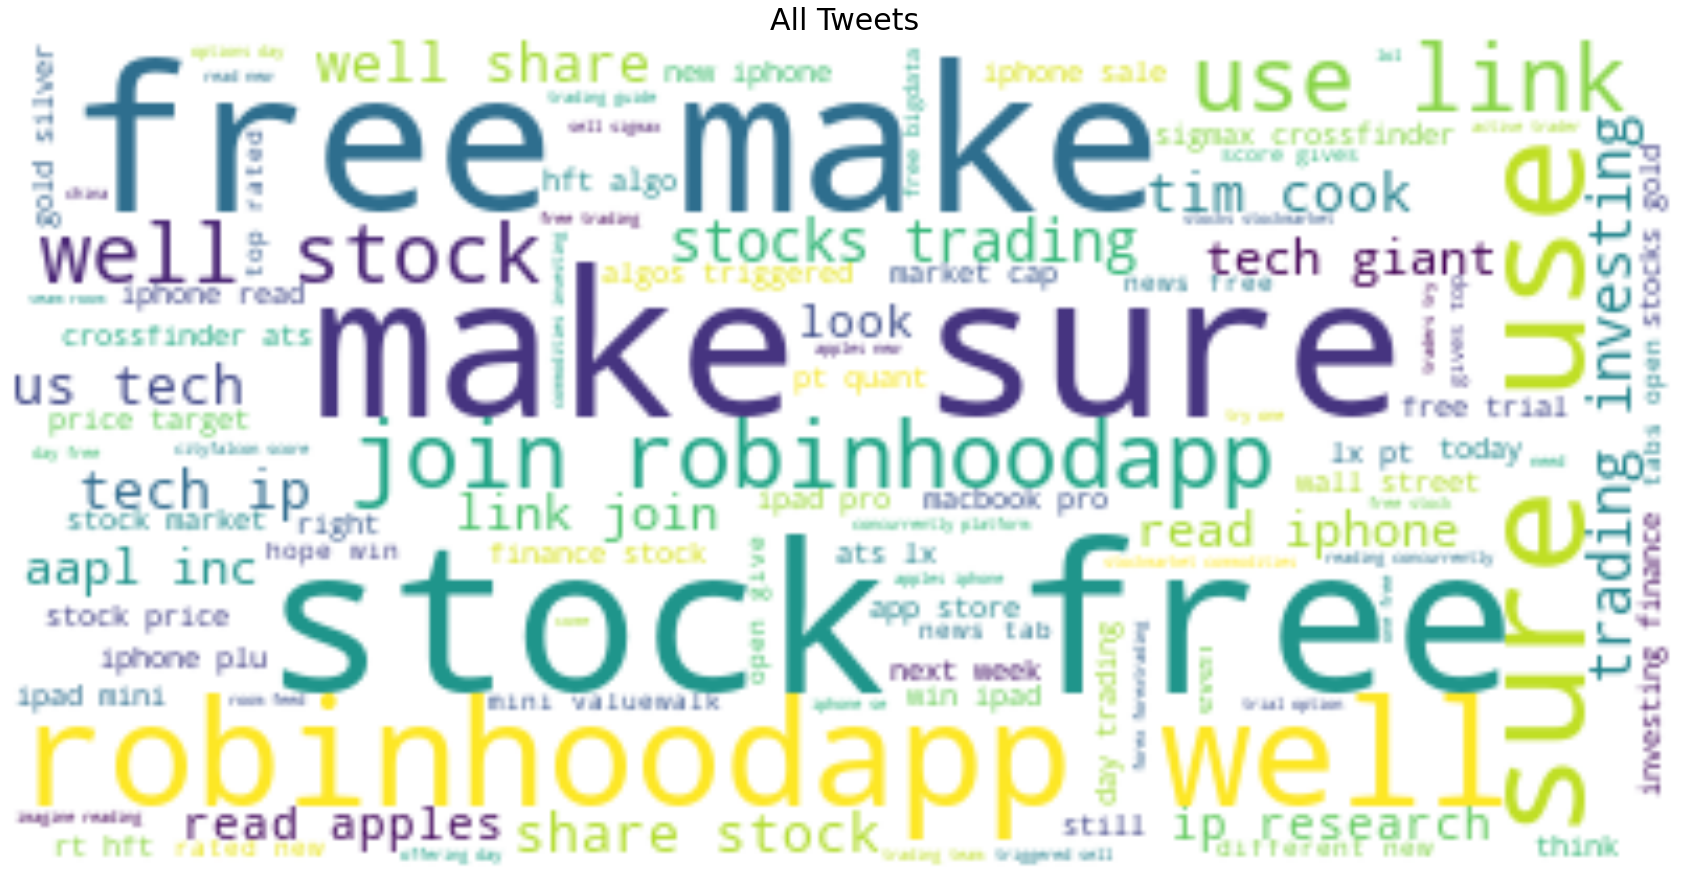

In [ ]:
fig, ax = plt.subplots(1, 1, figsize  = (30,30))
ax.imshow(wordcloud_ALL, interpolation='bilinear')
ax.set_title('All Tweets', fontsize=30)
ax.axis('off')

In [ ]:
list_need = every_tweet

In [ ]:
sid_obj = SentimentIntensityAnalyzer()
score = []
for i in trange(len(list_need)):
    sentiment_dict = sid_obj.polarity_scores(list_need[i])
    score.append(sentiment_dict)

  0%|          | 0/1425013 [00:00<?, ?it/s]

In [ ]:
#@title Default title text
all_score = []
for i in trange(len(list_need)):
    all_score.append(score[i]['compound'])

  0%|          | 0/1425013 [00:00<?, ?it/s]

In [ ]:
all_score_need = pd.DataFrame(all_score)
all_score_need.columns = ['score']
company1 = company.reset_index(drop=True)
company_final = pd.concat([all_score_need,company1],axis=1)
company_final = company_final[['score','body','date']]

In [ ]:
company_final['score'] = company_final['score'].astype('float')

company_final = company_final.replace(0,np.nan)

company_final = company_final.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False).reset_index(drop=True)

company_final_day_score = company_final.groupby(['date']).mean().reset_index()

In [ ]:
company_final

,score,body,date
0,-0.8271,Insanity of today weirdo massive selling. $aap...,2015-01-01
1,0.2023,$UNP $ORCL $QCOM $MSFT $AAPL Top scoring mega ...,2015-01-01
2,0.2023,@CNBC 15 Top #trades for #2015 #FastMoney $TIF...,2015-01-01
3,0.6369,We searched through hundreds of charts and fou...,2015-01-01
4,0.2023,Top 10 searched #stocks of #2014 $AAPL $FB $BA...,2015-01-01
...,...,...,...
785859,0.4404,"After its strongest year in a decade, Apple st...",2019-12-31
785860,0.4767,$AAPL as always the main act & beneficiary,2019-12-31
785861,0.4939,Imagine calling your broker-dealer and wanting...,2019-12-31
785862,0.7351,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",2019-12-31


In [ ]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as vadersent
sid_obj = vadersent()
vader_score = []
for i in trange(len(list_need)):
    sentiment_dict = sid_obj.polarity_scores(list_need[i])
    vader_score.append(sentiment_dict)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


  0%|          | 0/1425013 [00:00<?, ?it/s]

In [ ]:
!pip install afinn

from afinn import Afinn
sid_obj = Afinn()
afinn_score = []
for i in trange(len(list_need)):
    sentiment_dict = sid_obj.score(list_need[i])
    afinn_score.append(sentiment_dict)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.4 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=534cc8095021f6617dba5073c2c8da0fc8dccf12f763ad389428dba8a593bf21
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


  0%|          | 0/1425013 [00:00<?, ?it/s]

In [ ]:
vader_all_score = []
for i in trange(len(list_need)):
    vader_all_score.append(vader_score[i]['compound'])

  0%|          | 0/1425013 [00:00<?, ?it/s]

In [ ]:
all_scores = pd.DataFrame({'score': all_score, 'vader score':vader_all_score, 'afinn score':afinn_score})
company1 = company.reset_index(drop=True)
company_final = pd.concat([all_scores,company1],axis=1)
company_final = company_final[['score','vader score', 'afinn score','body','date']]
company_final['score'] = company_final['score'].astype('float')
company_final['vader score'] = company_final['vader score'].astype('float')
company_final['afinn score'] = company_final['afinn score'].astype('float')

company_final = company_final.replace(0,np.nan)

company_final = company_final.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False).reset_index(drop=True)

company_final_day_score = company_final.groupby(['date']).mean().reset_index()

In [ ]:
company_final

,score,vader score,afinn score,body,date
0,-0.8271,-0.8271,-3.0,Insanity of today weirdo massive selling. $aap...,2015-01-01
1,0.2023,0.2023,2.0,$UNP $ORCL $QCOM $MSFT $AAPL Top scoring mega ...,2015-01-01
2,0.2023,0.2023,2.0,@CNBC 15 Top #trades for #2015 #FastMoney $TIF...,2015-01-01
3,0.6369,0.6369,3.0,We searched through hundreds of charts and fou...,2015-01-01
4,0.2023,0.2023,2.0,Top 10 searched #stocks of #2014 $AAPL $FB $BA...,2015-01-01
...,...,...,...,...,...
677980,0.8481,0.8481,7.0,Great day and years end over at #TRICKTRADES m...,2019-12-31
677981,0.4404,0.4404,2.0,"After its strongest year in a decade, Apple st...",2019-12-31
677982,0.4939,0.4939,3.0,Imagine calling your broker-dealer and wanting...,2019-12-31
677983,0.7351,0.7351,2.0,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",2019-12-31


In [ ]:
company_final_day_score

,date,score,vader score,afinn score
0,2015-01-01,0.277434,0.277434,1.381944
1,2015-01-02,0.203309,0.203309,0.909774
2,2015-01-03,0.390725,0.390725,1.335025
3,2015-01-04,0.363717,0.363184,1.359307
4,2015-01-05,0.285076,0.285262,1.250000
...,...,...,...,...
1814,2019-12-27,0.314385,0.314377,1.733333
1815,2019-12-28,0.318190,0.318190,2.028571
1816,2019-12-29,0.309713,0.309713,1.705882
1817,2019-12-30,0.384881,0.385818,2.464935


### **Analysis with Componded Sentiment Score**

1.   Logistic
2.   KNN



In [ ]:
company_final_day_score.index = pd.to_datetime(company_final_day_score['date'])
df2 = company_stock["Close"].to_frame()
df2['Shift1'] = df2['Close'].shift(8)
df2['return'] = df2['Shift1']/df2['Close']-1
#df2['return'] = (df2['Close'] - df2['Shift1'])/df2['Shift1']
df2['Movement'] = np.where((df2['return'] >0 ),1,0)
df2['sentiment score'] = company_final_day_score['score']
df2['afinn sentiment score'] = company_final_day_score['afinn score']
#df2['tweet count'] = company_final_day_total['count']
df2 = df2.dropna()
df2

,Close,Shift1,return,Movement,sentiment score,afinn sentiment score
Date,,,,,,
2015-01-14,24.749958,24.644016,-0.004280,0,0.199603,0.969231
2015-01-15,24.078239,23.949759,-0.005336,0,0.126625,0.498986
2015-01-16,23.891151,23.952013,0.002547,1,0.174709,0.848233
2015-01-20,24.506517,24.287872,-0.008922,0,0.342873,1.656388
2015-01-21,24.693600,25.221066,0.021360,1,0.362303,1.798701
...,...,...,...,...,...,...
2019-12-23,69.672478,66.426842,-0.046584,0,0.287902,1.485816
2019-12-24,69.738716,66.596107,-0.045063,0,0.325492,2.021858
2019-12-26,71.122360,67.501358,-0.050912,0,0.339477,1.881356


In [ ]:
#X = df2['sentiment score'].values
X = df2[['afinn sentiment score']].values
Y= df2['Movement'].values
#X = X.reshape((len(X), 1))
X_train, X_test, y_train, y_test = train_test_split(X , Y, random_state = 10, test_size = 0.2)


In [ ]:
df2

,Close,Shift1,return,Movement,sentiment score,afinn sentiment score
Date,,,,,,
2015-01-14,24.784344,24.678251,-0.004281,0,0.199603,0.969231
2015-01-15,24.111687,23.983023,-0.005336,0,0.126625,0.498986
2015-01-16,23.924332,23.985277,0.002547,1,0.174709,0.848233
2015-01-20,24.540558,24.321611,-0.008922,0,0.342873,1.656388
2015-01-21,24.727909,25.256098,0.021360,1,0.362303,1.798701
...,...,...,...,...,...,...
2019-12-23,69.769264,66.519089,-0.046585,0,0.287902,1.485816
2019-12-24,69.835594,66.688622,-0.045063,0,0.325492,2.021858
2019-12-26,71.221161,67.595116,-0.050912,0,0.339477,1.881356


0.03643442967399568
Coefficient [[-0.01309874]]
Intercept [0.01254786]


Text(0, 0.5, 'Price')

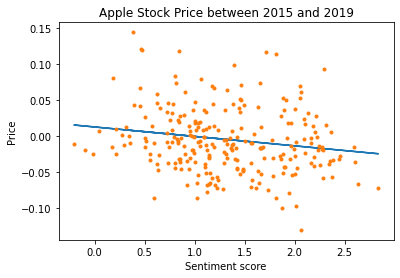

In [ ]:
from sklearn.linear_model import LinearRegression

window = 30
#X = df2[['afinn sentiment score']].values[window:-window]
X = df2[['afinn sentiment score']].values
#print(X)
#X = df2[['sentiment score']].values[1:-1]
#X = df2[['neg','neu','pos']].values
#Y = (df2['Movement'].values[window*2:] - df2['Close'].values[:-window*2])/df2['Close'].values[:-window*2]
Y = df2[['return']].values
#X = df2[['Shift1']].values
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, random_state = 10, test_size = 0.2)

reg = LinearRegression().fit(X_train, Y_train)
print(reg.score(X_test, Y_test))
print('Coefficient', reg.coef_)
print('Intercept', reg.intercept_)

#plt.plot(company_stock["Close"])
#plt.plot(df2['sentiment score'])
plt.plot(X_test,reg.predict(X_test))
plt.plot(X_test,Y_test, '.')
plt.title("Apple Stock Price between 2015 and 2019")
plt.xlabel("Sentiment score")
plt.ylabel("Price")
#plt.savefig("Apple Stock Price between 2015 and 2019")

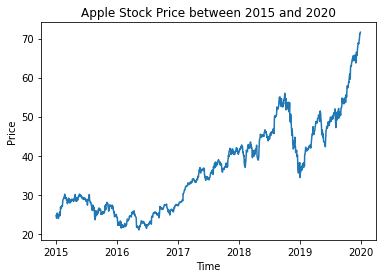

In [ ]:
plt.plot(company_stock["Close"])
plt.title("Apple Stock Price between 2015 and 2020")
plt.xlabel("Time")
plt.ylabel("Price")
plt.savefig("drive/MyDrive/Team39/Apple Stock Price between 2015 and 2020.png")
plt.show()

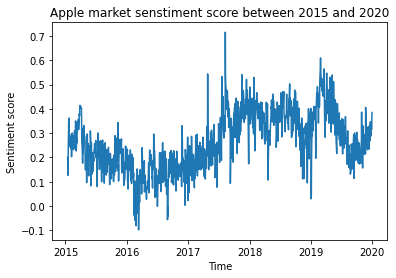

In [ ]:
plt.plot(df2['sentiment score'])
plt.title("Apple market senstiment score between 2015 and 2020")
plt.xlabel("Time")
plt.ylabel("Sentiment score")
plt.savefig("drive/MyDrive/Team39/Apple market sentiment score between 2015 and 2020.png")
plt.show()

# Logistic Regression

In [ ]:

logreg = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",logreg.score(X_test, y_test))


Accuracy: 0.656


# KNN with N from 1 to 10

In [ ]:
### KNN
for n in range(1,11):
  knn_model = KNeighborsClassifier(n_neighbors= n,weights ='distance')
  knn_model.fit(X_train, y_train)
  predict_train = knn_model.predict(X_train)
  predict_test = knn_model.predict(X_test)
  print("Accuracy:",metrics.accuracy_score(y_test, predict_test),"with KNN:", n)


Accuracy: 0.5 with KNN: 1
Accuracy: 0.5 with KNN: 2
Accuracy: 0.576 with KNN: 3
Accuracy: 0.552 with KNN: 4
Accuracy: 0.564 with KNN: 5
Accuracy: 0.552 with KNN: 6
Accuracy: 0.548 with KNN: 7
Accuracy: 0.54 with KNN: 8
Accuracy: 0.544 with KNN: 9
Accuracy: 0.552 with KNN: 10


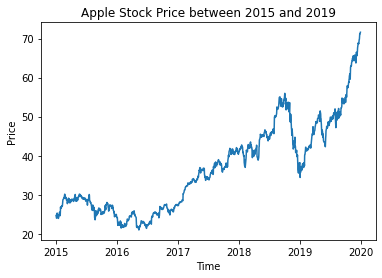

In [ ]:
plt.plot(company_stock["Close"])
plt.title("Apple Stock Price between 2015 and 2019")
plt.xlabel("Time")
plt.ylabel("Price")
plt.savefig("Apple Stock Price between 2015 and 2019")
plt.show()

# Analysis with Individual Sentiment Score: Neg, Neu, Pos

In [ ]:
df_score = pd.DataFrame(score)
company1 = company.reset_index(drop=True)
company_final = pd.concat([df_score,company1],axis=1)
company_final = company_final [["neg","neu","pos","body","date"]]
company_final['neg'] = company_final['neg'].astype('float')
company_final['neu'] = company_final['neu'].astype('float')
company_final['pos'] = company_final['pos'].astype('float')
company_final = company_final.replace(0,np.nan)
company_final = company_final.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False).reset_index(drop=True)
company_final_day_score_ = company_final.groupby(['date']).mean().reset_index()
company_final_day_score_.index=pd.to_datetime(company_final_day_score['date'])
#company_final_day_score_.index=pd.to_datetime(df['date'])
df2["neg"] = company_final_day_score_["neg"]
df2["pos"] = company_final_day_score_["pos"]
df2["neu"] = company_final_day_score_["neu"]

In [ ]:
df2

,Close,Shift1,return,Movement,sentiment score,afinn sentiment score,neg,pos,neu
Date,,,,,,,,,
2015-01-14,24.784344,24.678251,-0.004281,0,0.199603,0.969231,0.240817,0.265439,0.493780
2015-01-15,24.111687,23.983023,-0.005336,0,0.126625,0.498986,0.210079,0.251283,0.538583
2015-01-16,23.924332,23.985277,0.002547,1,0.174709,0.848233,0.277311,0.272136,0.450505
2015-01-20,24.540558,24.321611,-0.008922,0,0.342873,1.656388,0.217632,0.290596,0.491807
2015-01-21,24.727909,25.256098,0.021360,1,0.362303,1.798701,0.202983,0.289017,0.507983
...,...,...,...,...,...,...,...,...,...
2019-12-23,69.769264,66.519089,-0.046585,0,0.287902,1.485816,0.193433,0.206388,0.600134
2019-12-24,69.835594,66.688622,-0.045063,0,0.325492,2.021858,0.172714,0.241612,0.585735
2019-12-26,71.221161,67.595116,-0.050912,0,0.339477,1.881356,0.165614,0.245773,0.588648


In [ ]:
X = df2[["neg","pos","neu"]].values
Y= df2['Movement'].values
X_train, X_test, y_train, y_test = train_test_split(X , Y, random_state = 10, test_size = 0.2)

##  **Logistic Regression**

In [ ]:
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",logreg.score(X_test, y_test))

Accuracy: 0.64


# KNN

In [ ]:
### KNN
KNN_result = []
for n in range(1,11):
  knn_model = KNeighborsClassifier(n_neighbors= n,weights ='distance')
  knn_model.fit(X_train, y_train)
  predict_train = knn_model.predict(X_train)
  predict_test = knn_model.predict(X_test)
  KNN_result.append(predict_test)
  #KNN_result.add(predict_test)
  print("Accuracy:",metrics.accuracy_score(y_test, predict_test),"with KNN:", n)

Accuracy: 0.536 with KNN: 1
Accuracy: 0.536 with KNN: 2
Accuracy: 0.584 with KNN: 3
Accuracy: 0.568 with KNN: 4
Accuracy: 0.56 with KNN: 5
Accuracy: 0.576 with KNN: 6
Accuracy: 0.572 with KNN: 7
Accuracy: 0.552 with KNN: 8
Accuracy: 0.56 with KNN: 9
Accuracy: 0.564 with KNN: 10


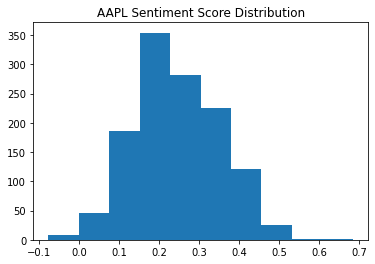

In [ ]:
plt.hist(df2['sentiment score'])
plt.title("AAPL Sentiment Score Distribution")
plt.show()